In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
data = pd.read_csv('Titanic.csv')

#Просмотр данных

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Столбцы "Age", "Cabin" и "Embarked" содержат пропуски

#Предобработка данных

##Работа с пропусками

Столбец "Cabin" содержит больше пропусков, чем заполненных значений. Заменим неизвестные значения на "Unknown".

In [ ]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

Пропущенные значения столбца "Embarked" заменим самыми частыми значениями, поскольку всего 2 пропуска.

In [ ]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

Заменим пропущенные значения столбца "Age" на среднее значения для класса пассажира.

In [ ]:
data['Age'] = data['Age'].fillna(data.groupby('Pclass')['Age'].transform('median'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Создание новых признаков

"Title" — титул пассажира

In [ ]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
#Группировка редких титулов
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

"FamilySize" — размер семьи (количество родственников на коробле, включая самого пассажира)

In [ ]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

"Dack" — палуба, на которой находится каюта пассажира

In [ ]:
data['Dack'] = data['Cabin'].apply(lambda x: x[0])

In [ ]:
#Группировка редких палуб
data['Dack'] = data['Dack'].replace('T', 'U')
data['Dack'] = data['Dack'].replace(['F', 'G'], 'E')
data['Dack'] = data['Dack'].replace('A', 'B')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Dack
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,2,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,1,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,1,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,Rare,1,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,Unknown,S,Miss,4,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,C


##Трансформация данных

###Кодирование категориальных переменных

In [ ]:
categorical_variables = ['Pclass', 'Embarked', 'Sex', 'Title', 'Dack']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_variables)
    ],
    remainder='drop'
)
encoded_data = preprocessor.fit_transform(data)
encoded_df = pd.DataFrame(
    encoded_data,
    columns=preprocessor.get_feature_names_out()
)
encoded_df.columns = encoded_df.columns.str.replace('onehot__', '')
encoded_df

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Dack_B,Dack_C,Dack_D,Dack_E,Dack_U
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###Масштабирование числовых переменных

In [ ]:
numeric_variables = ['Age', 'Fare', 'FamilySize']
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), numeric_variables)
    ],
    remainder='drop'
)
standard_data = preprocessor.fit_transform(data)
standard_df = pd.DataFrame(
    standard_data,
    columns=preprocessor.get_feature_names_out()
)
standard_df.columns = standard_df.columns.str.replace('standard__', '')
standard_df

,Age,Fare,FamilySize
0,-0.533834,-0.502445,0.059160
1,0.674891,0.786845,0.059160
2,-0.231653,-0.488854,-0.560975
3,0.448255,0.420730,0.059160
4,0.448255,-0.486337,-0.560975
...,...,...,...
886,-0.156107,-0.386671,-0.560975
887,-0.760469,-0.044381,-0.560975
888,-0.382743,-0.176263,1.299429
889,-0.231653,-0.044381,-0.560975


In [ ]:
data_train = pd.concat([data[['Survived']], standard_df, encoded_df], axis=1)
data_train

,Survived,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Dack_B,Dack_C,Dack_D,Dack_E,Dack_U
0,0,-0.533834,-0.502445,0.059160,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.674891,0.786845,0.059160,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,-0.231653,-0.488854,-0.560975,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.448255,0.420730,0.059160,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.448255,-0.486337,-0.560975,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.156107,-0.386671,-0.560975,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1,-0.760469,-0.044381,-0.560975,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,0,-0.382743,-0.176263,1.299429,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,-0.231653,-0.044381,-0.560975,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#Разведывательный анализ

##Анализ распределения переменных

Выведем гистограммы распределния переменных

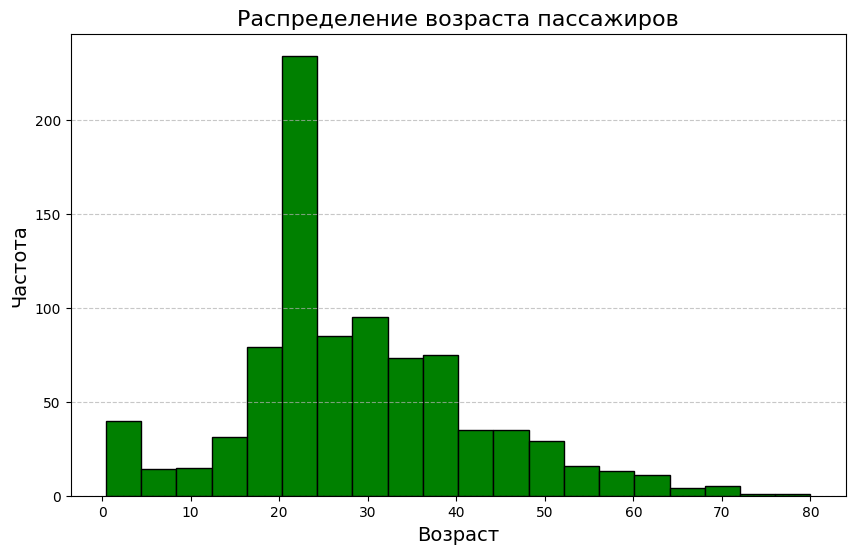

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='green', edgecolor='black')
plt.title('Распределение возраста пассажиров', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Параметр "Age" имеет нормальное распределение.

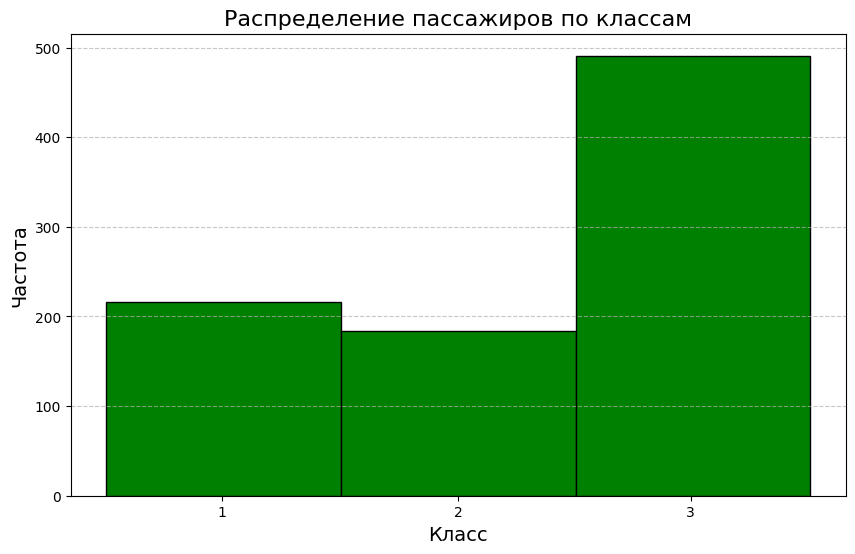

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Pclass'], bins=3, color='green', edgecolor='black')
plt.xticks([1.33, 2.0, 2.66], ["1", "2", "3"])
plt.title('Распределение пассажиров по классам', fontsize=16)
plt.xlabel('Класс', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большинство пассажиров имеют белеты 3-го класса.

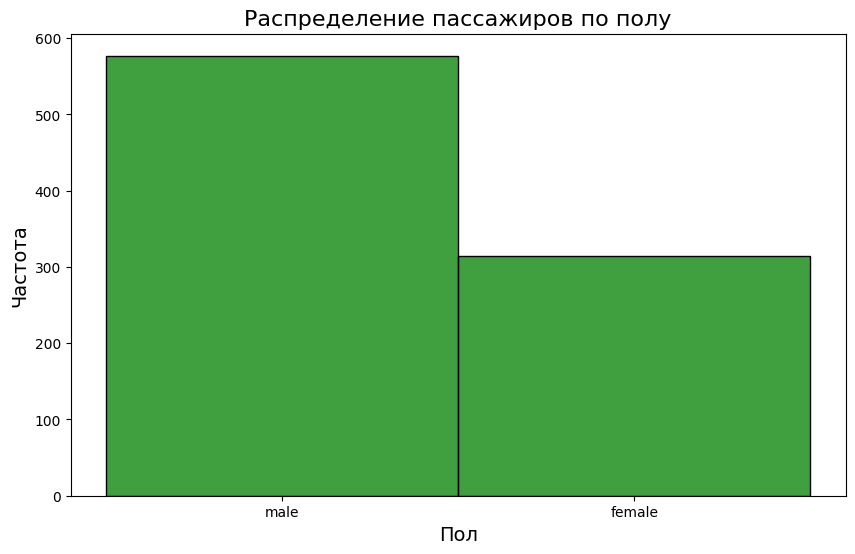

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sex'], color='green', edgecolor='black')
plt.title('Распределение пассажиров по полу', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Мужчин больше, чем женщин.

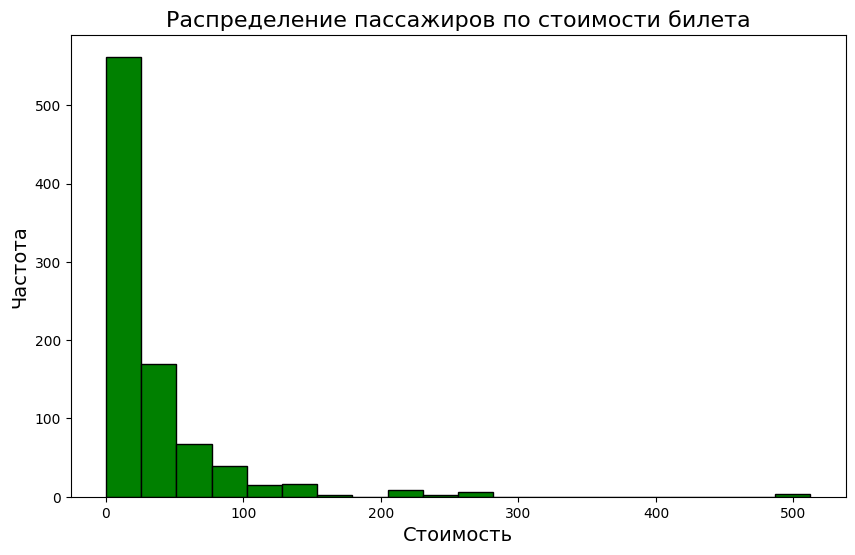

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Fare'], bins=20, color='green', edgecolor='black')
plt.title('Распределение пассажиров по стоимости билета', fontsize=16)
plt.xlabel('Стоимость', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Параметр "Fare" имеет экспоненциальное распределение.

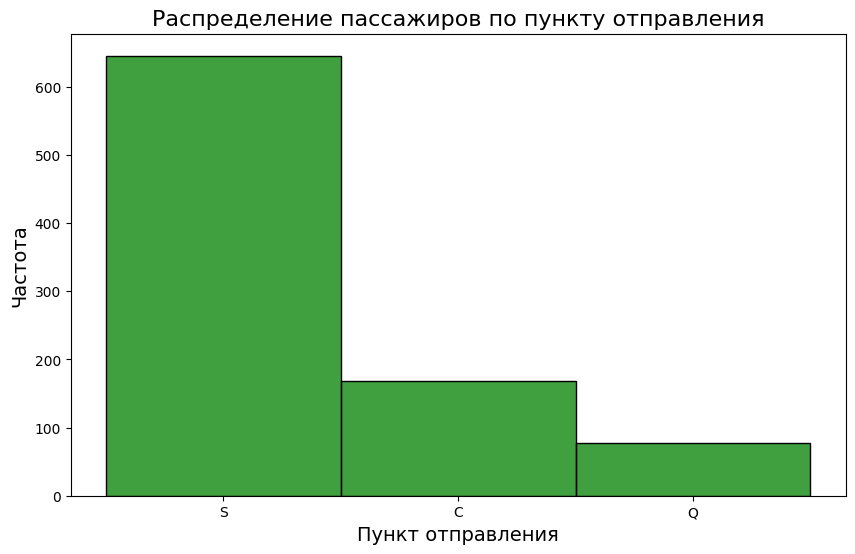

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Embarked'], color='green', edgecolor='black')
plt.title('Распределение пассажиров по пункту отправления', fontsize=16)
plt.xlabel('Пункт отправления', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Большинство пассажиров сели в S (Southampton).

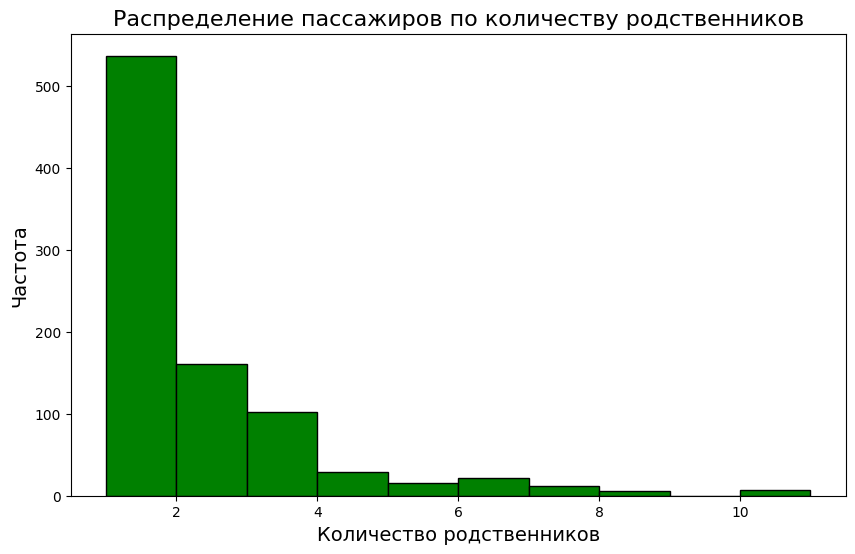

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['FamilySize'], color='green', edgecolor='black')
plt.title('Распределение пассажиров по количеству родственников', fontsize=16)
plt.xlabel('Количество родственников', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Параметр "FamilySize" имеет экспоненциальное распределение.

##Корреляционный анализ

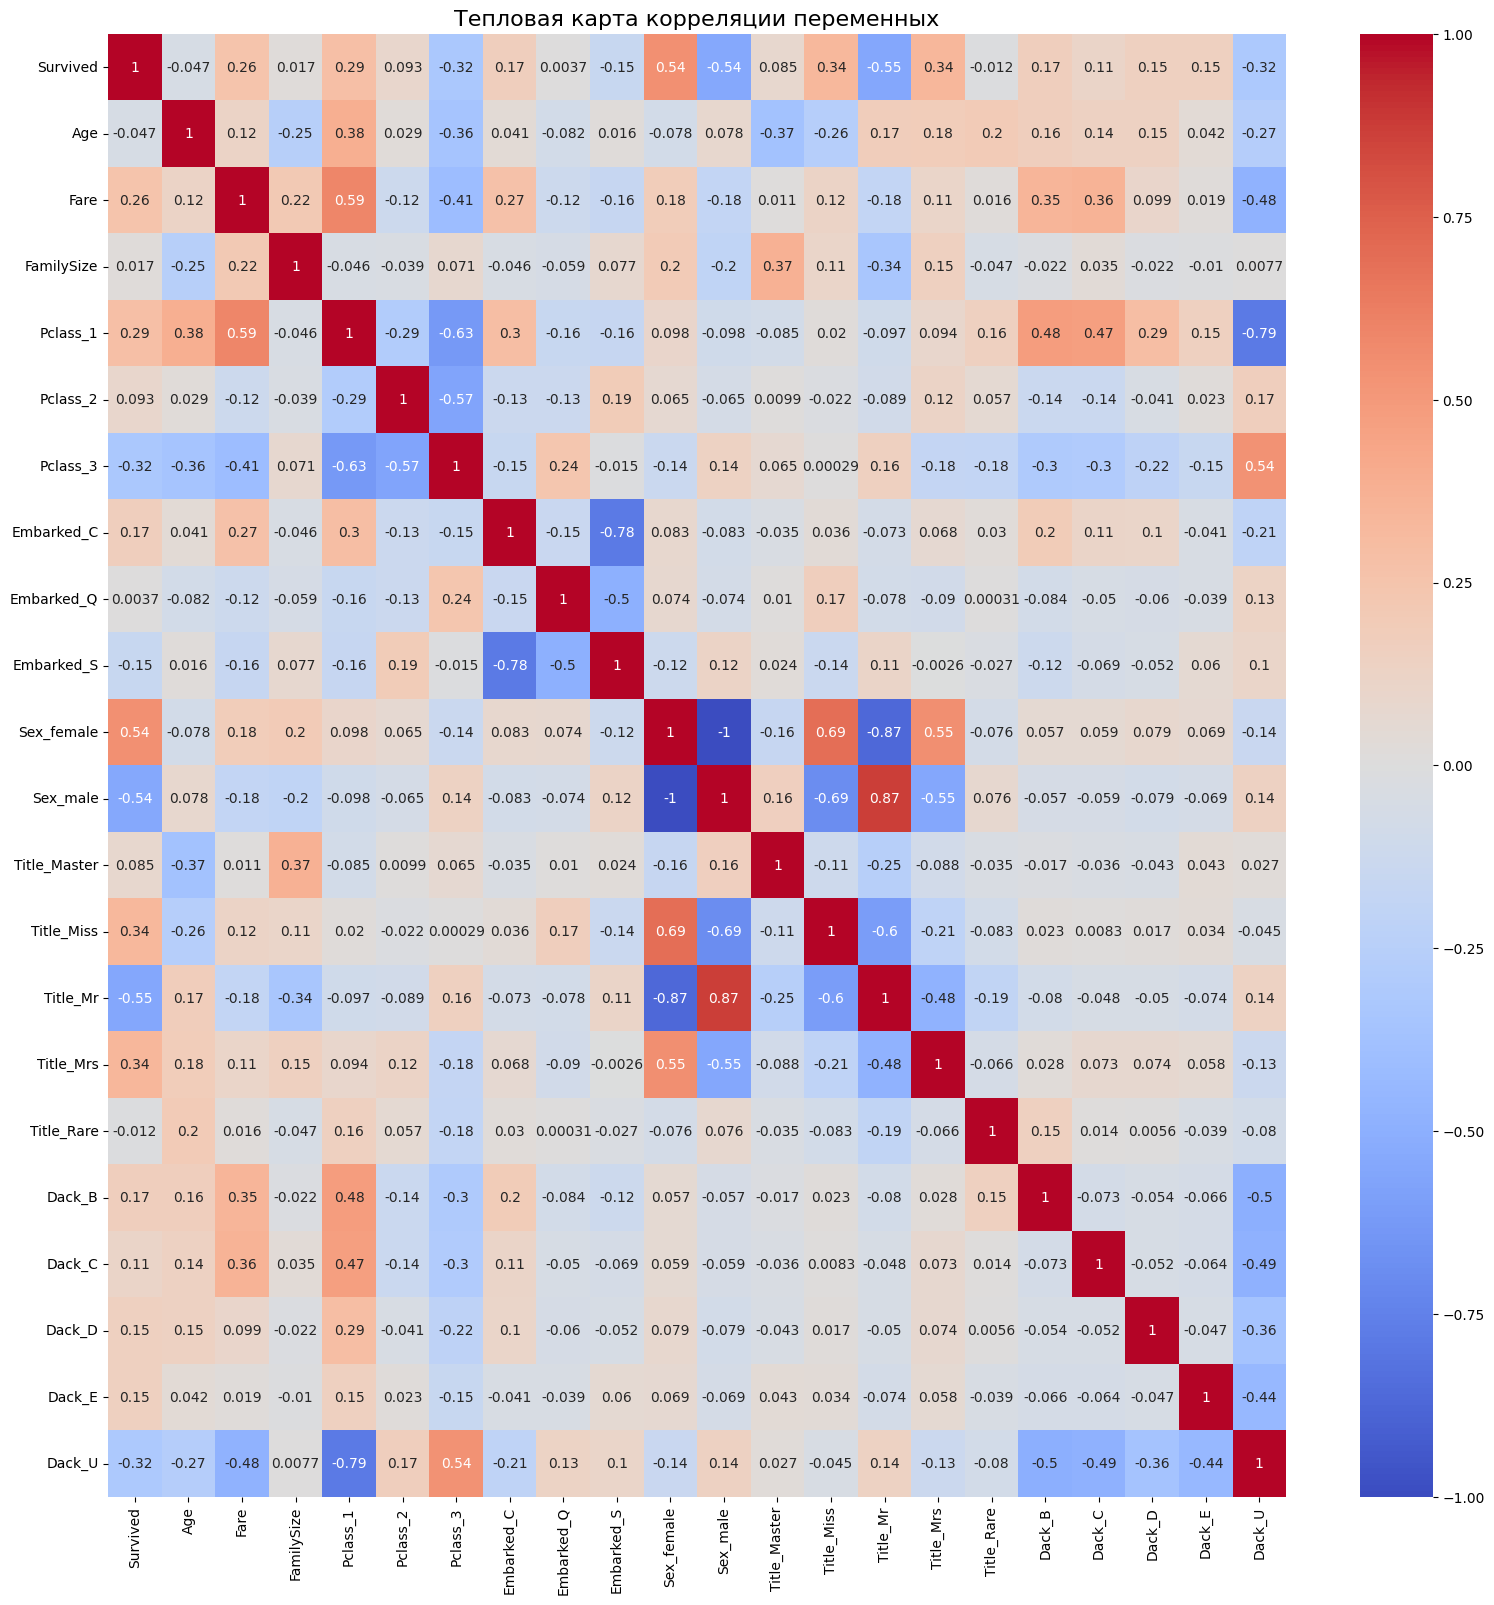

In [ ]:
plt.figure(figsize=(19, 19))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Тепловая карта корреляции переменных', fontsize=16)
plt.show()

1. Лучше всех с параметром Survived коррелирует пол: женщин выжило гораздо больше, чем мужчин (для Sex_female корреляция с Survived = 0,54, для Sex_male — -0,54). С этим связана и высокая корреляция признака Title, так как титул формируется на основе возраста и пола, что подтверждаеи высокая корреляция: 0,87 между этимим признаками.
2. Pclass — чем выше класс каюты, тем больше вероятность выживания: Pclass_1 (0,29), Pclass_2 (0,093), Pclass_3 (-0,32).
3. Fare (0,26) — чем выше стоимость билета, тем выше класс каюты.
4. Embarked_C (0,17) — люди, севшие в Cherbourg выжили с большей вероятностью.

#Эксперементы с моделями

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

In [ ]:
y = data_train['Survived']
X = data_train.drop('Survived', axis=1)
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
models = [
    ("LogisticRegression", LogisticRegression(random_state=42, solver='saga', max_iter=1000)),
    ("DecisionTree", DecisionTreeClassifier(random_state=42)),
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42, eval_metric='logloss')),
    ("LightGBM", LGBMClassifier(random_state=42, verbose=-1)),
    ("SVC", SVC(probability=True, random_state=42)),
    ("KNN", KNeighborsClassifier()),
]

In [ ]:
param_grids = {
    "LogisticRegression": {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [500, 1000, 5000],
    },
    "DecisionTree": {
        'max_depth': [None, 3, 5, 7, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
    },
    "RandomForest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'class_weight': [None, 'balanced']
    },
    "GradientBoosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'num_leaves': [31, 63],
        'learning_rate': [0.05, 0.1],
        'feature_fraction': [0.8, 1.0]
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
    }
}

Подберём лучшие параметры для каждой модели.

In [ ]:
def run_grid_search(models, param_grids, X, y):
    results = []
    best_models = {}

    for model_name, model in models:
        print(f"\nПодбор параметров для {model_name}")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_

        results.append({
            'Model': model_name,
            'Best Score': grid_search.best_score_,
            'Best Params': grid_search.best_params_
        })

        print(f"Лучшая точность: {grid_search.best_score_:.4f}")

    return pd.DataFrame(results), best_models

results_df, best_models = run_grid_search(models, param_grids, X, y)
results_df = results_df.sort_values('Best Score', ascending=False)

print()
print("Сравнение моделей:")
print(results_df.to_string(index=False))
print("\nЛучшая модель:", results_df.iloc[0]['Model'])
print("Точность:", results_df.iloc[0]['Best Score'])


Подбор параметров для LogisticRegression
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Лучшая точность: 0.8301

Подбор параметров для DecisionTree
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Лучшая точность: 0.8343

Подбор параметров для RandomForest
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Лучшая точность: 0.8343

Подбор параметров для GradientBoosting
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшая точность: 0.8399

Подбор параметров для XGBoost
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшая точность: 0.8427

Подбор параметров для LightGBM
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшая точность: 0.8315

Подбор параметров для SVC
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшая точность: 0.8343

Подбор параметров для KNN
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшая точность: 0.8427

Сравнение моделей:
             Model  Best

Лучшая модель: XGBoost

Точность: 0.842716

Лучшие параметры: {'learning_rate': 0.1,
'max_depth': 5,
'n_estimators': 100,
'subsample': 0.8}

In [ ]:
xgboost_model = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, subsample = 0.8)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Оценка работы модели

In [ ]:
predictions = xgboost_model.predict(X_test)
proba = xgboost_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, proba)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f"Точность: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Точность: 0.8268
ROC AUC: 0.8423
Precision: 0.7879
Recall: 0.7536
